# SESSION : 29 -> EDA (Titanic Dataset)

https://youtu.be/PPEHpg2RixQ

dataset : https://drive.google.com/drive/folders/1oFZxHRuAw_JI7soe46mmO61s-WM7jtQg

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv(r'titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [28]:
df.duplicated().sum()

0

for i in df.columns:
    if df[i].dtype != 'O':
        print(i,' ---> ', df[i].duplicated().sum())

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [26]:
for i in df.columns:
    if (df[i].dtype == 'O') & (df[i].nunique()<10):
        print(df[i].value_counts())
        print()
    else:
        continue

Sex
male      577
female    314
Name: count, dtype: int64

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64



In [33]:
df.skew(numeric_only=True)

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [35]:
df.drop(columns=['PassengerId'],inplace=True)

### Column Types

- **Numerical** - Age,Fare,PassengerId
- **Categorical** - Survived, Pclass, Sex, SibSp, Parch,Embarked
- **Mixed** - Name, Ticket, Cabin

### Univariate Analysis 

Univariate analysis focuses on analyzing each feature in the dataset independently.

- **Distribution analysis**: The distribution of each feature is examined to identify its shape, central tendency, and dispersion.

- **Identifying potential issues**: Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values

#### The shape of a data distribution refers to its overall pattern or form as it is represented on a graph. Some common shapes of data distributions include:

- **Normal Distribution**: A symmetrical and bell-shaped distribution where the mean, median, and mode are equal and the majority of the data falls in the middle of the distribution with gradually decreasing frequencies towards the tails.

- **Skewed Distribution**: A distribution that is not symmetrical, with one tail being longer than the other. It can be either positively skewed (right-skewed) or negatively skewed (left-skewed).

- **Bimodal Distribution**: A distribution with two peaks or modes.

- **Uniform Distribution**: A distribution where all values have an equal chance of occurring.

The shape of the data distribution is important in identifying the presence of outliers, skewness, and the type of statistical tests and models that can be used for further analysis.

#### **Dispersion** is a statistical term used to describe the spread or variability of a set of data. It measures how far the values in a data set are spread out from the central tendency (mean, median, or mode) of the data.

There are several measures of dispersion, including:

- **Range**: The difference between the largest and smallest values in a data set.

- **Variance**: The average of the squared deviations of each value from the mean of the data set.

- **Standard Deviation**: The square root of the variance. It provides a measure of the spread of the data that is in the same units as the original data.

- **Interquartile range (IQR)**: The range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data.

Dispersion helps to describe the spread of the data, which can help to identify the presence of outliers and skewness in the data.

### Steps of doing Univariate Analysis on Numerical columns

- **Descriptive Statistics**: Compute basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers.

- **Visualizations**: Create visualizations to explore the distribution of the data. Some common visualizations for numerical data include histograms, box plots, and density plots. These visualizations provide a visual representation of the distribution of the data and can help identify skewness an outliers.

- **Identifying Outliers**: Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis.

- **Skewness**: Check for skewness in the data and consider transforming the data or using robust statistical methods that are less sensitive to skewness, if necessary.

- **Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.


### Univariate analysis on Age column : 

In [52]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [55]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [84]:
print(f"total missing values in Age column is {df['Age'].isnull().sum()} which is {(df['Age'].isnull().sum()/df.shape[0])*100:.2f} % of total data")

total missing values in Age column is 177 which is 19.87 % of total data


In [93]:
sorted_age = [x for x in df['Age'].dropna().sort_values()]
print(sorted_age)

[0.42, 0.67, 0.75, 0.75, 0.83, 0.83, 0.92, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 7.0, 7.0, 7.0, 8.0, 8.0, 8.0, 8.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 10.0, 10.0, 11.0, 11.0, 11.0, 11.0, 12.0, 13.0, 13.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.5, 15.0, 15.0, 15.0, 15.0, 15.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0

In [89]:
min_age = np.min(sorted_age)
max_age = np.max(sorted_age)
mean_age = np.mean(sorted_age)
median_age = np.median(sorted_age)

print(f"min age : {min_age}, max age : {max_age}, mean age : {mean_age}, median age : {median_age}\n")

Q1 = np.percentile(sorted_age,25)
Q2 = np.percentile(sorted_age,50)
Q3 = np.percentile(sorted_age,75)
Q4 = np.max(sorted_age)

print(f"Q1 : {Q1}, Q2 : {Q2}, Q3 : {Q3}, Q4 : {Q4}\n")

IQR = Q3 - Q1

print(f"IQR is {IQR}\n")

print(f"upper range = {Q3 + 1.5* IQR} and lower range is {Q1 - 1.5 * IQR}")

min age : 0.42, max age : 80.0, mean age : 29.69911764705882, median age : 28.0

Q1 : 20.125, Q2 : 28.0, Q3 : 38.0, Q4 : 80.0

IQR is 17.875

upper range = 64.8125 and lower range is -6.6875


<Axes: xlabel='Age', ylabel='Count'>

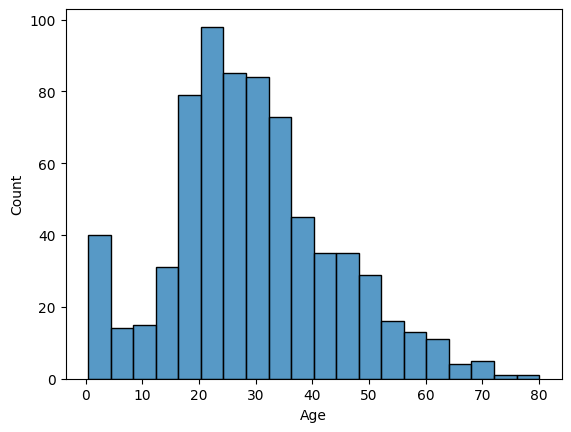

In [90]:
sns.histplot(df['Age'],bins=20)

<Axes: xlabel='Age', ylabel='Density'>

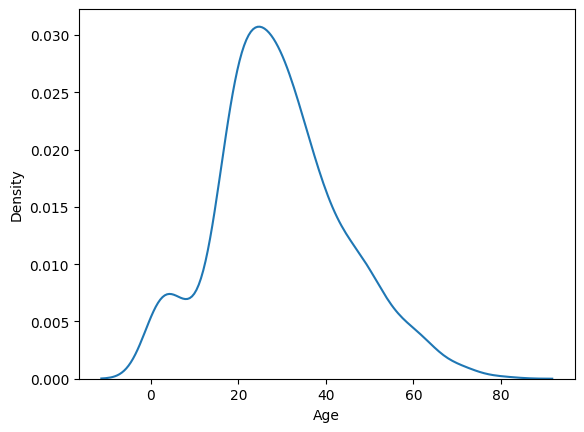

In [91]:
sns.kdeplot(df['Age'])

<Axes: ylabel='Age'>

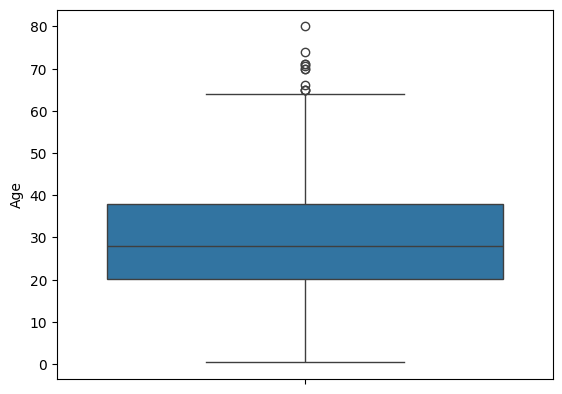

In [92]:
sns.boxplot(df['Age'])

In [43]:
df['Age'].skew()

0.38910778230082704

In [45]:
df['Age'].sort_values()

803    0.42
755    0.67
644    0.75
469    0.75
78     0.83
       ... 
859     NaN
863     NaN
868     NaN
878     NaN
888     NaN
Name: Age, Length: 891, dtype: float64

In [98]:
df[(df['Age']>64.8125) | (df['Age'] < -6.6875)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


#### Age column conclusions : 
- There total 177 missing values in the column and ie. 19.87 % of total data
- It is almost normally distributed with skewness of 0.3891077
- There are total 11 outliers at the upper range of 64.81 but it seems to be normal values

### Fare column

In [99]:
df['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [101]:
df['Fare'].duplicated().sum()

643

In [104]:
print(f"total null values in 'Fare' column is : {df['Fare'].isnull().sum()}")

total null values in 'Fare' column is : 0


In [105]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [106]:
sorted_fare = df['Fare'].sort_values()
print(sorted_fare)

271      0.0000
597      0.0000
302      0.0000
633      0.0000
277      0.0000
         ...   
438    263.0000
341    263.0000
737    512.3292
258    512.3292
679    512.3292
Name: Fare, Length: 891, dtype: float64


In [107]:
min_fare = np.min(sorted_fare)
max_fare = np.max(sorted_fare)
mean_fare = np.mean(sorted_fare)
median_fare = np.median(sorted_fare)

print(f"min fare : {min_fare}, max fare : {max_fare}, mean fare : {mean_fare}, median fare : {median_fare}\n")

Q1 = np.percentile(sorted_fare,25)
Q2 = np.percentile(sorted_fare,50)
Q3 = np.percentile(sorted_fare,75)
Q4 = np.max(sorted_fare)

print(f"Q1 : {Q1}, Q2 : {Q2}, Q3 : {Q3}, Q4 : {Q4}\n")

IQR = Q3 - Q1

print(f"IQR is {IQR}\n")

print(f"upper range = {Q3 + 1.5* IQR} and lower range is {Q1 - 1.5 * IQR}")

min fare : 0.0, max fare : 512.3292, mean fare : 32.204207968574636, median fare : 14.4542

Q1 : 7.9104, Q2 : 14.4542, Q3 : 31.0, Q4 : 512.3292

IQR is 23.0896

upper range = 65.6344 and lower range is -26.724


In [111]:
df['Fare'].skew()

4.787316519674893

<Axes: xlabel='Fare', ylabel='Count'>

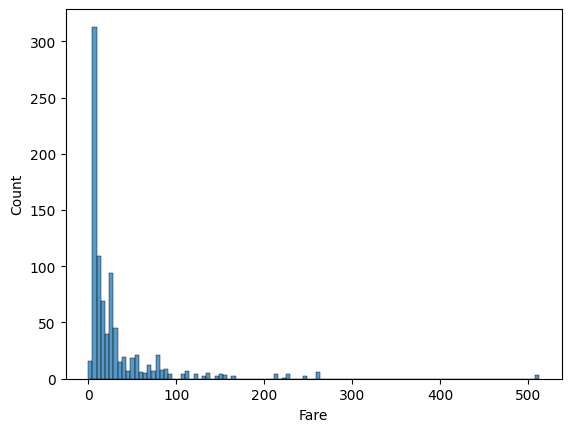

In [108]:
sns.histplot(df['Fare'])

<Axes: xlabel='Fare', ylabel='Density'>

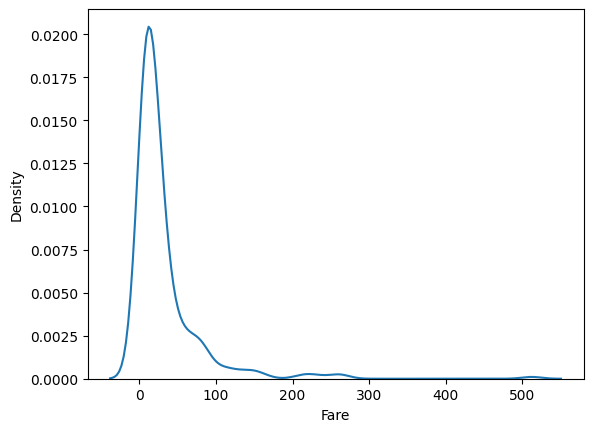

In [109]:
sns.kdeplot(df['Fare'])

<Axes: ylabel='Fare'>

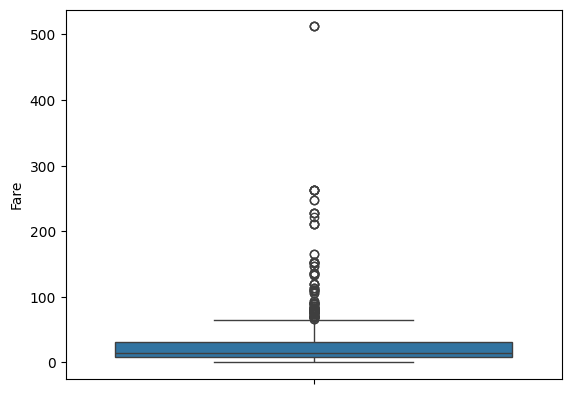

In [110]:
sns.boxplot(df['Fare'])

In [113]:
df[(df['Fare'] > 65.6344) | (df['Fare'] < -26.724)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...
846,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
849,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
856,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


In [118]:
df[df['Fare']>250]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


#### Fare column conclusions : 
- Values in fare column is not only for individual ticket price, if someone is travelling with family then total ticket price is there for all the passengers.
- There total 0 missing values in the column.
- It is right skewed with skewness of 4.787.
- There are total 116 outliers at the upper range of 65.634 and -26.72 but it seems to be normal values

### Steps of doing Univariate Analysis on Categorical columns

**Descriptive Statistics**: Compute the frequency distribution of the categories in the column. This will give a general understanding of the distribution of the categories and their relative frequencies.

**Visualizations**: Create visualizations to explore the distribution of the categories. Some common visualizations for categorical data include count plots and pie charts. These visualizations provide a visual representation of the distribution of the categories and can help identify any patterns or anomalies in the data.

**Missing Values**: Check for missing values in the data and decide how to handle them. Missing values can be imputed or excluded from the analysis, depending on the research question and the data set.

**Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

### Embarked column

The port where the passenger boarded the Titanic.

- C: Cherbourg (France).

- Q: Queenstown (Ireland).

- S: Southampton (United Kingdom).

In [119]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [120]:
df['Embarked'].isnull().sum()

2

In [123]:
df[df['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [122]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: ylabel='count'>

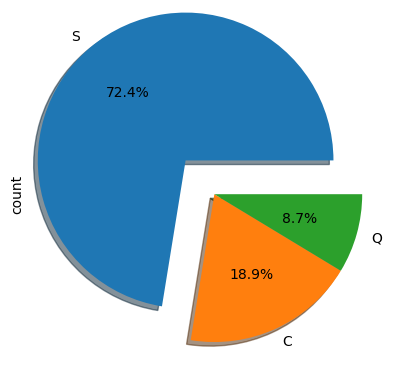

In [145]:
df['Embarked'].value_counts().plot(kind='pie',autopct='%0.1f%%',shadow=True,explode=[0.3,0,0])

### Pclass

The class in which the passenger traveled, representing a proxy for socioeconomic status.

- 1: First class (Upper class).

- 2: Second class (Middle class).

- 3: Third class (Lower class).

In [151]:
df['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [152]:
df['Pclass'].isnull().sum()

0

In [153]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: ylabel='count'>

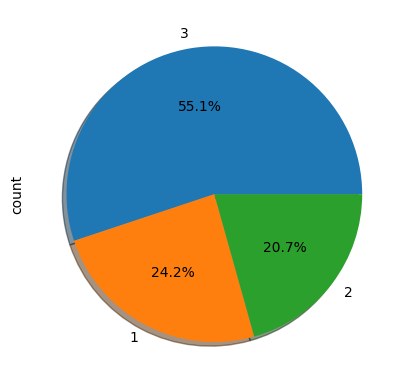

In [154]:
df['Pclass'].value_counts().plot(kind='pie',autopct='%0.1f%%',shadow=True)

### Sex

In [156]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [157]:
df['Sex'].isnull().sum()

0

<Axes: ylabel='count'>

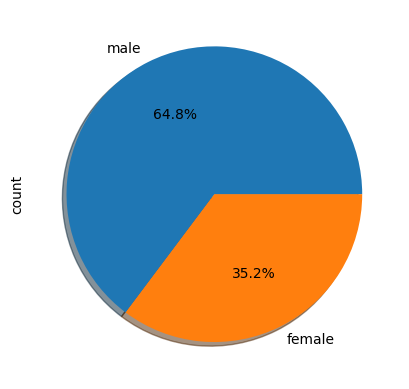

In [155]:
df['Sex'].value_counts().plot(kind='pie',autopct='%0.1f%%',shadow=True)

## SibSp

Number of siblings or spouses aboard the Titanic.

- Siblings: Brothers, sisters, stepbrothers, and stepsisters.

- Spouses: Husband or wife (not including fiancé/fiancée).

In [160]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [161]:
df['SibSp'].isnull().sum()

0

<Axes: ylabel='count'>

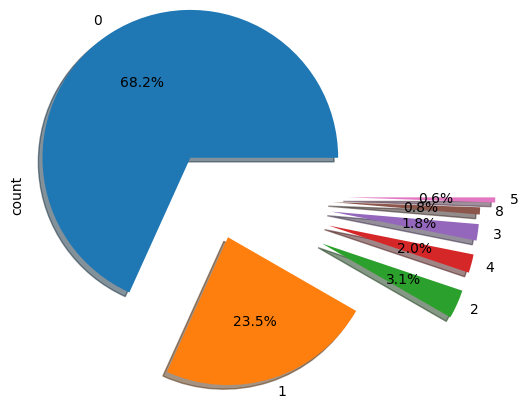

In [172]:
df['SibSp'].value_counts().plot(kind='pie',autopct='%0.1f%%',shadow=True,explode=[0.3,0.3,0.8,0.8,0.8,0.8,0.9])

### Parch

Number of parents or children aboard the Titanic.


- Parent: Mother, father.


- Child: Daughter, son, stepdaughter, stepson.


- Some children traveled with only a nanny or other guardian, not necessarily with their parents.

In [173]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [174]:
df['Parch'].isnull().sum()

0

[]

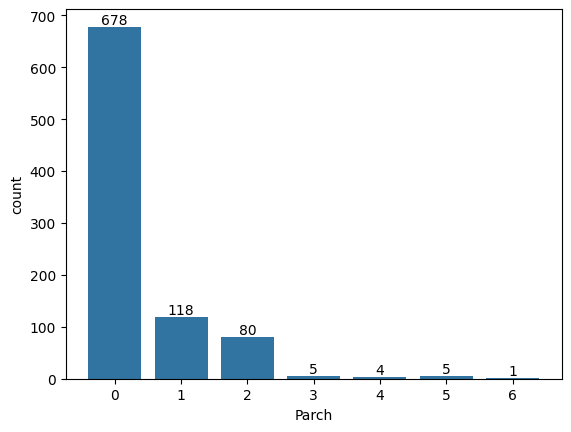

In [198]:
ax = sns.countplot(data=df,x='Parch')
ax.bar_label(ax.containers[0])
plt.plot()

<Axes: xlabel='Parch'>

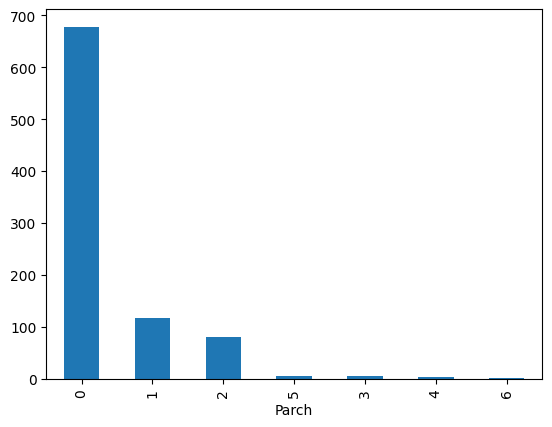

In [179]:
df['Parch'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

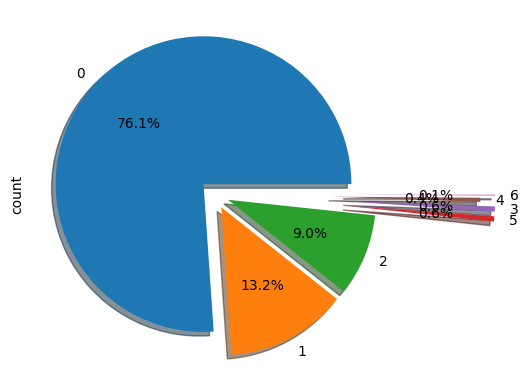

In [178]:
df['Parch'].value_counts().plot(kind='pie',autopct='%0.1f%%',shadow=True,explode=[0.1,0.1,0.1,0.9,0.9,0.8,0.9])

### Survived column

In [146]:
df['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [147]:
df['Survived'].isnull().sum()

0

In [148]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: ylabel='count'>

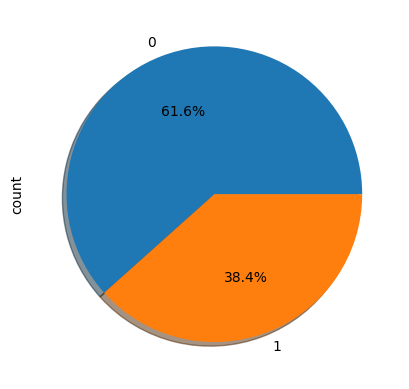

In [150]:
df['Survived'].value_counts().plot(kind='pie',autopct='%0.1f%%',shadow=True)

### Survived column conclusions : 
- only 38.4% people Survived

- Parch and SibSp cols can be merged to form a new col call family_size


- Create a new col called is_alone

### Steps of doing Bivariate Analysis

- Select 2 cols
- Understand type of relationship
    1. **Numerical - Numerical**<br>
        a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots<br>
        b. Check correlation coefficent to check linear relationship
    2. **Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.<br>
        a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots<br>
    3. **Categorical - Categorical**<br>
        a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.<br>
        b. You can plots like heatmap, stacked barplots, treemaps
        
- Write your conclusions

In [199]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [209]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

### Survived vs Pclass

In [210]:
pd.crosstab(df['Survived'],df['Pclass'],margins=True)

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


In [226]:
pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


- Most people died from Pclass =3, most survived from Pclass 1

<Axes: xlabel='Pclass', ylabel='Survived'>

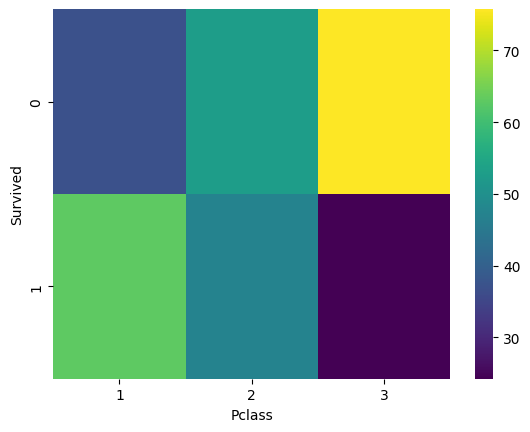

In [227]:
sns.heatmap(pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100,cmap='viridis')

### Survived vs Sex

In [221]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [222]:
pd.crosstab(df['Survived'],df['Sex'],margins=True)

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


In [224]:
pd.crosstab(df['Survived'],df['Sex'],normalize='columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


<Axes: xlabel='Sex', ylabel='Survived'>

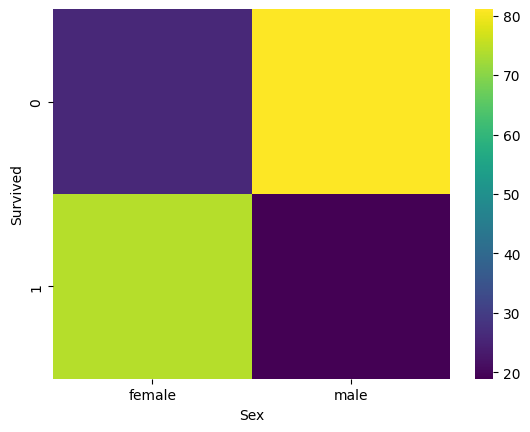

In [225]:
sns.heatmap(pd.crosstab(df['Survived'],df['Sex'],normalize='columns')*100,cmap='viridis')

### Survived vs Embarked :

In [228]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [229]:
pd.crosstab(df['Survived'],df['Embarked'],margins=True)

Embarked,C,Q,S,All
Survived,,,,
0,75,47,427,549
1,93,30,217,340
All,168,77,644,889


In [236]:
pd.crosstab(df['Survived'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


<Axes: xlabel='Embarked', ylabel='Survived'>

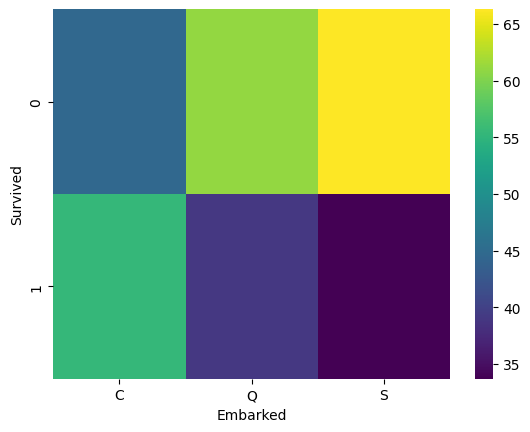

In [230]:
sns.heatmap(pd.crosstab(df['Survived'],df['Embarked'],normalize='columns')*100,cmap='viridis')

In [242]:
pd.crosstab(df['Sex'],df['Embarked'],normalize='columns',margins=True)*100

Embarked,C,Q,S,All
Sex,,,,
female,43.452381,46.753247,31.521739,35.095613
male,56.547619,53.246753,68.478261,64.904387


In [244]:
pd.crosstab(df['Pclass'],df['Embarked'],margins=True)

Embarked,C,Q,S,All
Pclass,,,,
1,85,2,127,214
2,17,3,164,184
3,66,72,353,491
All,168,77,644,889


In [243]:
pd.crosstab(df['Pclass'],df['Embarked'],normalize='columns',margins=True)*100

Embarked,C,Q,S,All
Pclass,,,,
1,50.595238,2.597403,19.720497,24.071991
2,10.119048,3.896104,25.465839,20.697413
3,39.285714,93.506494,54.813665,55.230596


- 50% of people who boraded from C are of Pclass = 1

### Age vs Survived

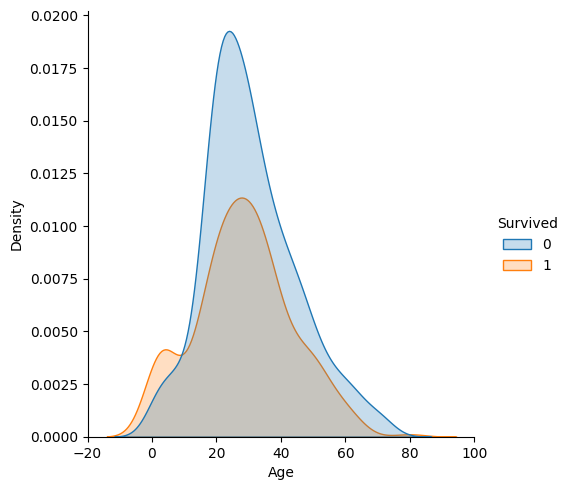

In [261]:
sns.displot(data=df,x='Age',kind='kde',hue='Survived',fill=True)
plt.xlim(-20,100)
plt.show()

### Creating new column = individual fare , family_size and family_type

In [278]:
df['individual_fare']= df['Fare']/(df['SibSp'] + df['Parch'] + 1)

In [279]:
df['family_size'] = df['SibSp'] + df['Parch'] + 1

In [291]:
df['family_size'].value_counts()

family_size
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [287]:
def family_types(x):
    if x == 1:
        return 'single'
    elif (x>1) & (x<5):
        return 'small_family'
    else:
        return 'large_family'

In [288]:
df['family_type'] = df['family_size'].apply(family_types)

In [289]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500,2,small_family
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165,2,small_family
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500,1,single
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000,2,small_family
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.05000,1,single


In [295]:
df['family_type'].value_counts()

family_type
single          537
small_family    292
large_family     62
Name: count, dtype: int64

In [281]:
df['individual_fare'].describe()

count    891.000000
mean      19.916375
std       35.841257
min        0.000000
25%        7.250000
50%        8.300000
75%       23.666667
max      512.329200
Name: individual_fare, dtype: float64

In [282]:
df['family_size'].describe()

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: family_size, dtype: float64

In [276]:
df[df['individual_fare']==512.329200]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,512.3292
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,512.3292


<Axes: >

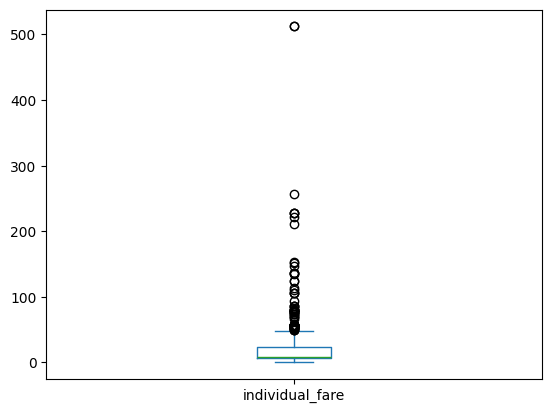

In [274]:
df['individual_fare'].plot(kind='box')

In [297]:
pd.crosstab(df['Survived'],df['family_type'],margins=True)

family_type,large_family,single,small_family,All
Survived,,,,
0,52,374,123,549
1,10,163,169,342
All,62,537,292,891


In [300]:
pd.crosstab(df['Survived'],df['family_type'],normalize='columns')*100

family_type,large_family,single,small_family
Survived,,,
0,83.870968,69.646182,42.123288
1,16.129032,30.353818,57.876712


- If you are travelling in a small family, your chances of survival is higher

### correlation

In [303]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'individual_fare', 'family_size',
       'family_type'],
      dtype='object')

In [304]:
df[['Survived', 'Pclass','Sex', 'Age', 'SibSp', 'Parch','Fare','Embarked', 'individual_fare', 'family_size',
       'family_type']]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,individual_fare,family_size,family_type
0,0,3,male,22.0,1,0,7.2500,S,3.62500,2,small_family
1,1,1,female,38.0,1,0,71.2833,C,35.64165,2,small_family
2,1,3,female,26.0,0,0,7.9250,S,7.92500,1,single
3,1,1,female,35.0,1,0,53.1000,S,26.55000,2,small_family
4,0,3,male,35.0,0,0,8.0500,S,8.05000,1,single
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,13.00000,1,single
887,1,1,female,19.0,0,0,30.0000,S,30.00000,1,single
888,0,3,female,NaN,1,2,23.4500,S,5.86250,4,small_family
889,1,1,male,26.0,0,0,30.0000,C,30.00000,1,single


In [308]:
import pandas as pd

# Assuming df is your DataFrame
# Convert categorical columns to numerical using one-hot encoding
df_encoded = pd.get_dummies(df[['Survived', 'Pclass','Sex', 'Age', 'SibSp', 'Parch','Fare','Embarked', 'individual_fare', 'family_size',
       'family_type']])

# Now calculate the correlation with 'Survived'
correlation_with_survived = df_encoded.corr()['Survived'].sort_values(ascending=False)

# Display the correlation values
pd.DataFrame(correlation_with_survived)


,Survived
Survived,1.000000
Sex_female,0.543351
family_type_small_family,0.279855
Fare,0.257307
individual_fare,0.221600
Embarked_C,0.168240
Parch,0.081629
family_size,0.016639
Embarked_Q,0.003650
SibSp,-0.035322
